# Punto 3 - Trabajo Práctico 6

In [5]:
from IPython.display import IFrame
IFrame("./Punto4.pdf", width=1000, height=1000)

## Verificación del circuto con LTspice

### Circuito simulado con valores calculados:
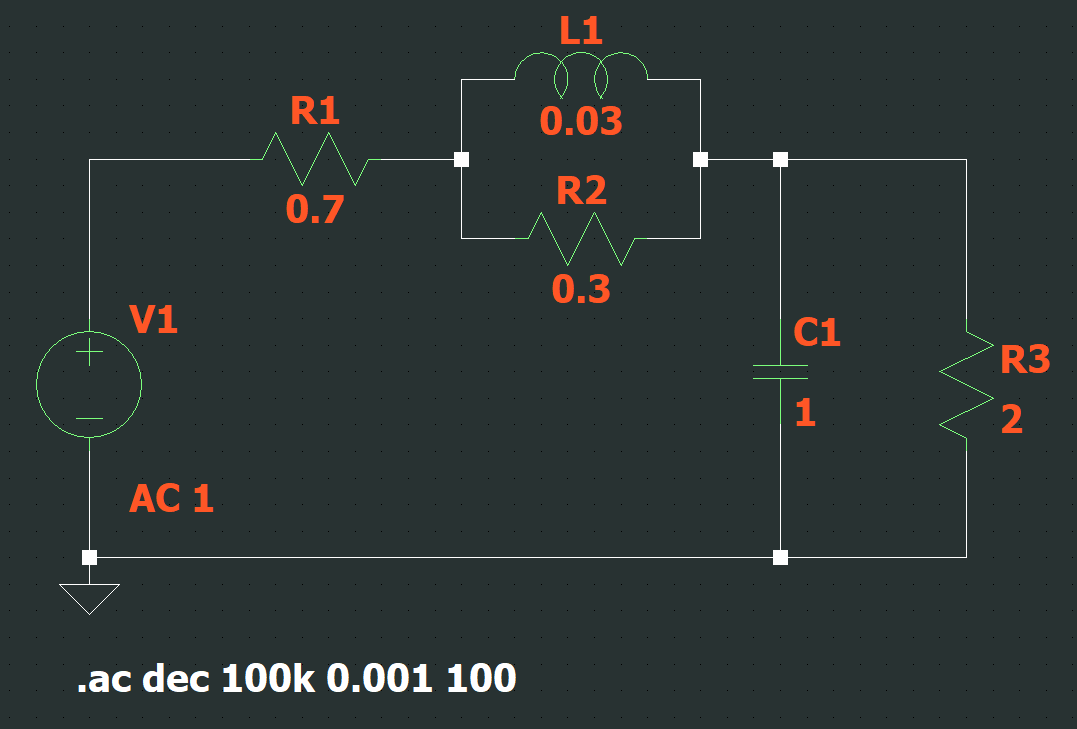

### Se lo compara con la expresión de impedancia que se plantea en el enunciado:

## $Z_{(S)}=\frac{S^2+10S+24} {S^2+12S+20}$

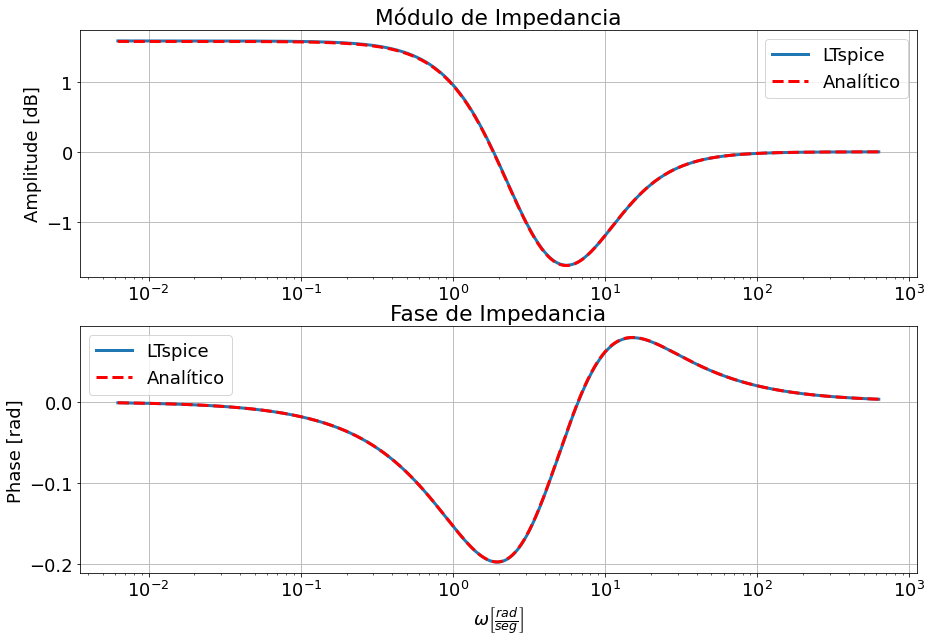

In [4]:
import scipy.signal as sig
import ltspice
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 18})

l = ltspice.Ltspice("./Simulacion_LTspice/4.raw")
l.parse()

fig, axes = plt.subplots(2, 1, figsize=(15,10))

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
Z = 1/l.get_data('I(V1)') #1V/I_V1 = Z (V1 = 1V)

Z_amplitude = 20 * np.log10(np.abs(Z))
Z_angle = np.unwrap(np.angle(Z))-np.pi

#Comparo con la función de excitación de la consigna
num = [1,10,24]
den = [1,12,20]
w, F = sig.freqs(num,den,freq*2*np.pi)
    
axes[0].semilogx(freq*2*np.pi, Z_amplitude, linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(F)), 'r--', linewidth=3.0, label='Analítico')

axes[1].semilogx(freq*2*np.pi, Z_angle, linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.angle(F), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[0].set_title("Módulo de Impedancia")
axes[1].set_title("Fase de Impedancia")

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

axes[0].legend()
axes[1].legend()

plt.show()

### Se observa que la curva analítica y la simulada con LTspice coinciden, por lo que se verifica correctamente que el circuito calculado cumple con la expresión de impedancia de entrada solicitada.